In [ ]:
!wget -q http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishFnt.tgz
!tar -xzvf EnglishFnt.tgz

In [ ]:
import numpy as np
from skimage import io
import os
from PIL import Image
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
def add_margin(pil_img, top, right, bottom, left, color):
  width, height = pil_img.size
  new_width = width + right + left
  new_height = height + top + bottom
  result = Image.new(pil_img.mode, (new_width,   new_height), color)
  result.paste(pil_img, (left, top))
  return result

In [ ]:
dataset=[]
labels=[]
count=0
fnt_path = r"English/Fnt/"
folders= os.listdir(fnt_path)
for i in folders:
  for j in os.listdir(fnt_path+str(i)):
     im_new=add_margin(Image.open(fnt_path+str(i)+'/'+str(j)), 10, 10,10, 10, (255))
     resized_image = im_new.resize((32,32))
     dataset.append(np.array([  np.asarray(resized_image)/255.0 ] ))
     labels.append(count)
  count+=1

In [ ]:
np.array(dataset).shape

(62992, 1, 32, 32)

In [ ]:
dataset = np.array(dataset).reshape(62992,32,32,1)
labels = np.array(labels).reshape(-1,1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
type_encoder = OneHotEncoder()
labels=type_encoder.fit_transform(labels).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset,labels, test_size=0.33, random_state=42)

In [ ]:
y_train.shape

(42204, 62)

In [ ]:
model = Sequential()
# Convolution
model.add(Conv2D(32, (3, 3), input_shape = (32,32,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
# Pooling
# Convolution
model.add(Conv2D(64, (3, 3),  activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(128, (3, 3),  activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#model.add(Dropout(0.25))
# Flattening
model.add(Flatten())
# Full connection
#model.add(Dense(units = 512, activation = 'relu'))
#model.add(Dropout(0.5))
model.add(Dense(units = 256, activation = 'relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 62, activation = 'softmax'))
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [ ]:
history = model.fit(x_train, y_train, batch_size = 4, epochs = 100, validation_data=(x_test, y_test),verbose=1)
model.save('Model.h5')

Epoch 1/100
10551/10551 [==============================] - 72s 6ms/step - loss: 1.1547 - accuracy: 0.6564 - val_loss: 0.5260 - val_accuracy: 0.8154
Epoch 2/100
10551/10551 [==============================] - 57s 5ms/step - loss: 0.5956 - accuracy: 0.7911 - val_loss: 0.4678 - val_accuracy: 0.8284
Epoch 3/100
10551/10551 [==============================] - 57s 5ms/step - loss: 0.5216 - accuracy: 0.8141 - val_loss: 0.4407 - val_accuracy: 0.8293
Epoch 4/100
10551/10551 [==============================] - 57s 5ms/step - loss: 0.4891 - accuracy: 0.8233 - val_loss: 0.4215 - val_accuracy: 0.8362
Epoch 5/100
10551/10551 [==============================] - 67s 6ms/step - loss: 0.4719 - accuracy: 0.8333 - val_loss: 0.4262 - val_accuracy: 0.8453
Epoch 6/100
10551/10551 [==============================] - 67s 6ms/step - loss: 0.4606 - accuracy: 0.8331 - val_loss: 0.4159 - val_accuracy: 0.8489
Epoch 7/100
10551/10551 [==============================] - 57s 5ms/step - loss: 0.4461 - accuracy: 0.8362 - val_

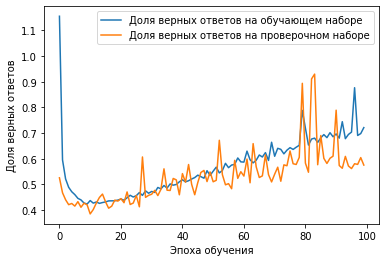

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_loss'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [ ]:
#Улучшенная модель
!wget -q https://github.com/smagodi1/OCR-from-scratch/raw/main/ocr_scripOnly/model.h5
#Картинка для примера
!wget -q https://raw.githubusercontent.com/smagodi1/OCR-from-scratch/main/ocr_scripOnly/test.png

In [ ]:
!pip install ckwrap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.6/142.6 KB 3.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
from skimage import io
import pandas as pd 
import pickle
import os
from tensorflow import keras
from PIL import Image, ImageOps,ImageDraw
import math
import time

if not os.path.exists("dump"):
  os.makedirs("dump")

def ocr(patho):
    model = keras.models.load_model('model.h5')
    logo=Image.open(patho)
    
    logo=ImageOps.grayscale(logo)
    logo=np.asarray(logo)
    
    # color to black nad white
    a=logo.copy()
    for i in range(len(logo)):
        for j in range(len(logo[0,:])):
            if logo[i][j]==logo[0][0]:
                a[i][j]=255
            else:
                a[i][j]=0
    logo=a
    #Image.fromarray(logo).save('out.png')
    coords=[]
    xycoords=[]
    def black_and_white(a):# takes np array image
        m=a.copy()
        for i in range(len(m)):
            for j in range(len(m[0])):
                if m[i][j] >200:
                    m[i][j]=255
                else:
                    m[i][j]=0
        return m
    def line_coords(coords):
        xmin=coords[0][0][0]
        xmax=coords[-1][0][0]
        ymin=20000
        ymax=0
        for i in coords:
            for j in i:
                if j[1] >ymax:
                    ymax=j[1]
                if j[1] < ymin:
                    ymin=j[1]
        xycoords.append([xmin,xmax+2,ymin+1,ymax])
    




    for i in range(len(logo[1:-1,1:-1])):
        coo=[]
        flag=0
        for c in logo[1:-1,1:-1][i]:
            if c<200:
                flag=1
        if flag==1:
            for b in range(len(logo[1:-1,1:-1][i])):
                if logo[1:-1,1:-1][i][b]>200:
                    try:
                        if logo[1:-1,1:-1][i][b+1] <200:
                            coo.append([i,b+1])
                            #print(i,b+1)
                    except:
                        pass
                if logo[1:-1,1:-1][i][b]<200:
                    try:
                        if logo[1:-1,1:-1][i][b+1] > 200:
                            coo.append([i,b])
                            #print(i,b+1)

                    except:
                        pass
        else:
            if len(coords)>0:
                line_coords(coords)
                coords=[]
            
        if len(coo)>0:
            #print('hurrah')
            coords.append(coo)
    
    
    
    
# removal of row containing only dots
    
    def avg(yVal):    #accept numpy array
        avg=sum(np.asarray(yVal))/len(yVal)
        return avg

    yVal=[]
    finalXY=[]
    
    for i in range(len(xycoords)):
        yVal.append(xycoords[i][1]-xycoords[i][0])
    for i in range(len(xycoords)):
        if (xycoords[i][1]-xycoords[i][0])>=(avg(yVal)-(avg(yVal)*0.7)):
            finalXY.append(xycoords[i])
## spaces labeling
    spaces=np.array([0])
    print(finalXY)
    ctr=0
    for y in finalXY:
        sp=[]
        a=black_and_white(logo[y[0]:y[1],y[2]:y[3]])
        for i in range(len(a[0,:])):

            f=0
            for j in a[:,i]:
                if j==0:
                    f=1
            if f!=1:
                ctr+=1
            if f==1:
                sp.append(ctr)
                ctr=0
        import ckwrap
        
        nums= np.array([jj for jj in sp if jj!=0])
        if len(nums)==0:
            spaces=np.concatenate((spaces,np.array([2])), axis=None)
        else:
            print('nums are - '+str(nums))
            #print(nums)
            km = ckwrap.ckmeans(nums,2)
            print('labs are - '+str(km.labels))
            print('final are - '+str(finalXY))
            spaces=np.concatenate((spaces,km.labels,np.array([2])), axis=None)


    col=[]
# dump pieces of characters
    count=0
    for line in finalXY:    
        newC=[0]
        def flagCalc(i):
            flag = 1
            jo=0
            for j in range(len(logo[line[0]:line[1],line[2]:line[3]][:,i])):
                if  logo[line[0]:line[1],line[2]:line[3]][:,i][j]<150:
                    flag=0
                    jo=j
            #print(flag)
            return flag        

        for i in range(len(logo[line[0]:line[1],line[2]:line[3]][0,:])):
            try:
                if flagCalc(i)<flagCalc(i+1):
                    newC.append(i+1)
            except:
                pass
        newC.append(line[3])
        col.append(newC)
        for i in range(len(newC)-1):   
            A=black_and_white(logo[line[0]:line[1],line[2]:line[3]][:,newC[i]:newC[i+1]])
            im = Image.fromarray(A)
            im.save("dump/"+str(count)+".png")
            count+=1  


    def borderRemoval(path):
        a = io.imread(path)
        
        #print(a)
        for i in range(len(a)):
            for j in range(len(a[0])):
                if a[i][j] >200:
                    a[i][j]=255
                else:
                    a[i][j]=0
        def flagCalc(i):
            flag = 0
            for j in range(len(i)):
                if  i[j]==0:
                    flag=1

            return flag       
        y1=0
        y2=a.shape[0]
        x1=0
        x2=a.shape[1]
        
        
        for i in range(len(a)-1):
            #print(flagCalc(a[i])) 
            if flagCalc(a[i])<flagCalc(a[i+1]):
                y2=a.shape[0]
                if (i+1)< y2:
                    y1=i+1
            elif flagCalc(a[i])>flagCalc(a[i+1]):
                if (i-1)>y1:
                    y2=i-1
        for i in range(len(a[0,:])-1):
            #print(flagCalc(a[i])) 
            if flagCalc(a[:,i])<flagCalc(a[:,i+1]):
                if (i+1)< x2:
                    x1=i+1
            elif flagCalc(a[:,i])>flagCalc(a[:,i+1]):
                if (i-1)>x1:
                    x2=i-1   
        im = Image.fromarray(a[y1:y2,x1:x2])
       # print(y1,y2,x1,x2)
        im.save(path)
    
    def PasteImage(path):
        a = io.imread(path)
        if a.shape[0] > a.shape[1]  :
            f=28/a.shape[0]
        else:
            f=28/a.shape[1]
        b=Image.fromarray(a,mode='L').resize((int(a.shape[1]*f),int(a.shape[0]*f)),Image.BICUBIC)
        c=Image.fromarray(np.full((32, 32), 255).astype('uint8'),mode='L')
        img_w, img_h = b.size
        bg_w, bg_h = c.size
        offset = ((bg_w - img_w) // 2, (bg_h - img_h) // 2)
        c.paste(b, offset)
        
        c.save(path)
    def BnW(path):
        a = io.imread(path)
        for i in range(len(a)):
            for j in range(len(a[0])):
                if a[i][j]>200:
                    a[i][j] = 255
                else:
                    a[i][j]=0
        Image.fromarray(a,mode='L').save(path)
    for mm in os.listdir(r"dump/"):
        #print(r"dump/"+str(mm))
        borderRemoval(r"dump/"+str(mm))
        PasteImage(r"dump/"+str(mm))
        BnW(r"dump/"+str(mm))
    
    #json data create
    import json
    data = {}
    data['box'] = []
    for i in range(len(col)):
        for j in range(len(col[i])-1):
            
            data['box'].append({
                
                'x1':finalXY[i][0] ,
                'x2':finalXY[i][1] ,
                'y1': finalXY[i][2]+col[i][j],
                'y2':finalXY[i][2]+col[i][j+1]
            })

    labs={0: 0,1: 1, 2: 2, 3: 3,4: 4,5: 5,6: 6,7: 7,8: 8,9: 9,
    10: 'A',
    11: 'B', 12: 'C', 13: 'D', 14: 'E',
    15: 'F', 16: 'G', 17: 'H',
    18: 'I', 19: 'J',20: 'K',
    21: 'L',22: 'M',
    23: 'N', 24: 'O', 25: 'P',26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U',31: 'V', 32: 'W',33: 'X',
    34: 'Y',35: 'Z',36: 'a',37: 'b',38: 'c',39: 'd',40: 'e',41: 'f',42: 'g',43: 'h',44: 'i',45: 'j',46: 'k',47: 'l',48: 'm', 49: 'n',50: 'o',51: 'p', 52: 'q',
    53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y',
    61: 'z'}
    def add_margin(pil_img, top, right, bottom, left, color):
        width, height = pil_img.size
        new_width = width + right + left
        new_height = height + top + bottom
        result = Image.new(pil_img.mode, (new_width, new_height), color)
        result.paste(pil_img, (left, top))
        return result
    co=-1
    STRING=''
    charPred=[]
    
    print('len of box '+ str(len(data['box'])))
    while True:
        co+=1
        try:
            if spaces[co]==1:
                STRING=STRING+' '
            elif spaces[co]==2:
                STRING=STRING+'<br>'
            image = Image.open('dump/'+str(co)+'.png')
            

            #print(co)
            im_new = add_margin(image, 10, 10,10, 10, (255))
            resized_image = im_new.resize((32,32))


            a=np.asarray(resized_image)/255
            
            hehe=labs[np.argmax(model.predict([a.reshape(32,32,1).tolist()]))]
            charPred.append(hehe)
            #print(hehe)
            os.remove('dump/'+str(co)+'.png')
            #image.save("imgo/"+str(co)+'_'+str(hehe)+ ".png")

            #Image.fromarray((a*255).astype('uint8'), mode='L').save("imgi/"+str(co)+'_'+str(hehe)+ ".png")
            
            #model.predict([a.tolist()])
            STRING+=str(hehe)
        except:
            break
    return STRING.split('<br>')
print(ocr('test.png'))

[[18, 72, 148, 820], [109, 179, 26, 580], [201, 255, 148, 834], [292, 346, 28, 549]]
nums are - [ 6 10  8 25  8 21  6  8 21  1 10  4  4 24 10 10  8 24  4]
labs are - [0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0]
final are - [[18, 72, 148, 820], [109, 179, 26, 580], [201, 255, 148, 834], [292, 346, 28, 549]]
nums are - [ 7 10  8 20  4  4  1 22  4  4 10 11  9  8  7]
labs are - [0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]
final are - [[18, 72, 148, 820], [109, 179, 26, 580], [201, 255, 148, 834], [292, 346, 28, 549]]
nums are - [ 6 10  8 25  8 21  6  8 24  6  6  5  9  8 28 10 10  8]
labs are - [0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0]
final are - [[18, 72, 148, 820], [109, 179, 26, 580], [201, 255, 148, 834], [292, 346, 28, 549]]
nums are - [ 4 15  6  8 23  5 11  9 21  4  4  2  5]
labs are - [0 1 0 0 1 0 0 0 1 0 0 0 0]
final are - [[18, 72, 148, 820], [109, 179, 26, 580], [201, 255, 148, 834], [292, 346, 28, 549]]
len of box 69
1/1 [==============================] - 0s 33ms/step
['Thls ls the flrst llne of', 't

**Использованные ресурсы**:

https://medium.com/@magodiasanket/ocr-optical-character-recognition-from-scratch-using-deep-learning-a6a599963d71

